### K-Means

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 5)

import warnings
warnings.simplefilter('ignore')
from sklearn.decomposition import PCA

from kneed import KneeLocator
from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch

In [2]:
#loading the preprocessed database.
#Loading the dataset
df=pd.read_csv('delays_self1.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
df = df.sample(frac =.2).reset_index()
df=df.drop(['index','Unnamed: 0'], axis=1)
df.head()

,Month,DayOfWeek,DepTime,ArrTime,UniqueCarrier,CRSElapsedTime,Origin,Dest,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay
0,0.094432,0.146838,0.50,0.75,0.196030,-0.638554,0.030212,0.024777,0.984985,0.994494,0.0,0.873373,0.0,0.00000,0.988989
1,0.048860,0.149545,0.25,0.50,0.196030,0.927711,0.028729,0.012912,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.183183
2,0.094432,0.133957,0.25,0.25,0.100105,1.349398,0.064209,0.024290,0.443944,0.000000,0.0,0.000000,0.0,0.00000,0.183183
3,0.082297,0.136125,0.50,0.50,0.196030,-0.216867,0.002002,0.005155,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.183183
4,0.052977,0.115651,0.50,0.75,0.100105,1.469880,0.002863,0.017766,0.636136,0.000000,0.0,0.000000,0.0,0.85035,0.625125


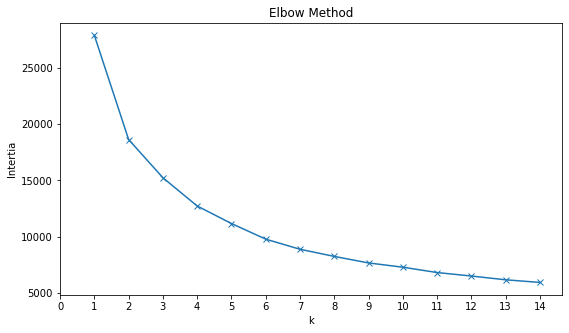

In [3]:
intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    intertia.append(km.inertia_)
plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

In [4]:
colze = KneeLocator(range(1, 15), intertia, curve="convex", direction="decreasing")
print('Ideal cluster number is:', colze.elbow)

Ideal cluster number is: 4


##### Implementing K-means Algorithm

In [5]:
# Perform K-means algorithm

km = KMeans(n_clusters=4,random_state = 42, n_init= km.n_iter_, init='random')
kfit=km.fit(df)
y_kmeans = km.predict(df)

centroids = km.cluster_centers_
C = km.cluster_centers_


In [6]:
#Appending the identified clusters to the original data

pca = PCA(n_components=2)
ppcc=pca.fit_transform(df)

principalDf = pd.DataFrame(data = ppcc, columns = ['component1', 'component2'])

principalDf['Cluster'] = y_kmeans
principalDf.head()


,component1,component2,Cluster
0,-0.834277,0.719846,0
1,0.745925,-0.642792,1
2,1.154973,-0.390273,2
3,-0.397713,-0.654671,1
4,1.243889,0.491113,2


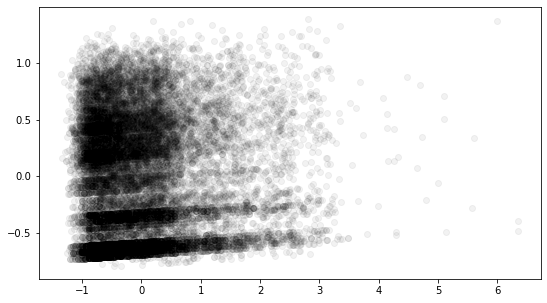

In [7]:
plt.scatter(principalDf['component1'], principalDf['component2'], alpha=.05, color='black')

##### Plotting our Clusters and Centroids

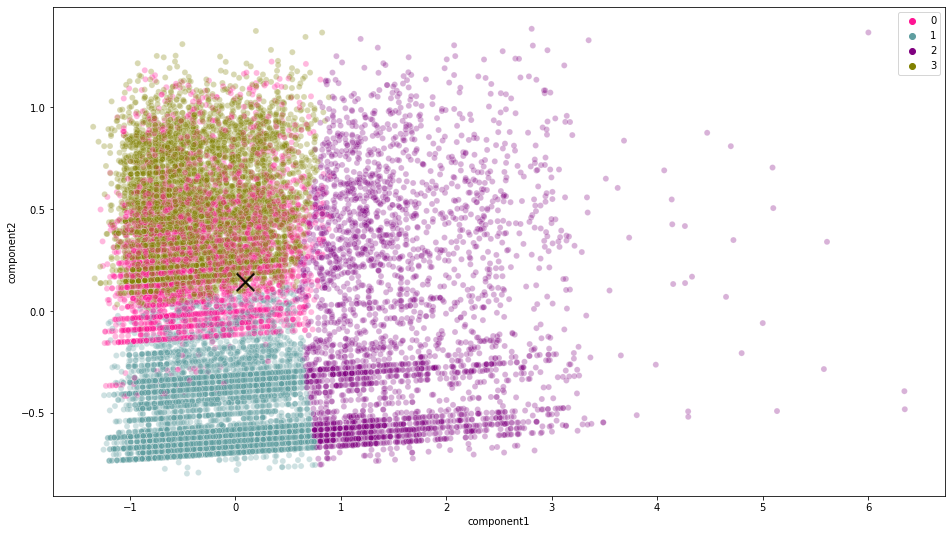

In [8]:
plt.rcParams['figure.figsize'] = (16, 9)

# Predicting the clusters
labels = km.predict(df)

colores=['deeppink','cadetblue','purple','olive']
#,'deeppink','sienna','tomato','darkcyan','cadetblue','purple','olive'
asignar=[]
for row in labels:
    asignar.append(colores[row])

sns.scatterplot(data=principalDf, x="component1", y="component2", hue= y_kmeans, palette = colores, alpha = 0.3)
centers = km.cluster_centers_# Plot centers

plt.scatter(centers[:, 0], centers[:, 1],color='k', s=300, marker="x", alpha = 0.5);


In [9]:
from sklearn import metrics
labels = km.labels_
sil=metrics.silhouette_score(df, labels, metric = 'euclidean')
if sil < 0:
    print('silhouette:',round(sil,4),'-- sample2 have been assigned to the wrong cluster')
elif sil < 0.5:
    print('silhouette:',round(sil,4),'-- overlaping samples')
else:
    print('silhouette:',round(sil,4),'-- good clustering')

silhouette: 0.3137 -- overlaping samples


In [10]:
#CH score
print ('CH Score:',metrics.calinski_harabasz_score(df, labels))

CH Score: 7658.006974220052


<br><br><br>

### AgglomerativeClustering

In [12]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(df)
labels = model.labels_

In [13]:
labels

array([3, 2, 1, ..., 1, 2, 2])

In [14]:
#Appending the identified clusters to the original data

pca = PCA(n_components=2)
ppcc=pca.fit_transform(df)

aggdf = pd.DataFrame(data = ppcc, columns = ['component1', 'component2'])

aggdf['Cluster'] = labels
aggdf.head()

,component1,component2,Cluster
0,-0.834277,0.719846,3
1,0.745925,-0.642792,2
2,1.154973,-0.390273,1
3,-0.397713,-0.654671,2
4,1.243889,0.491113,1


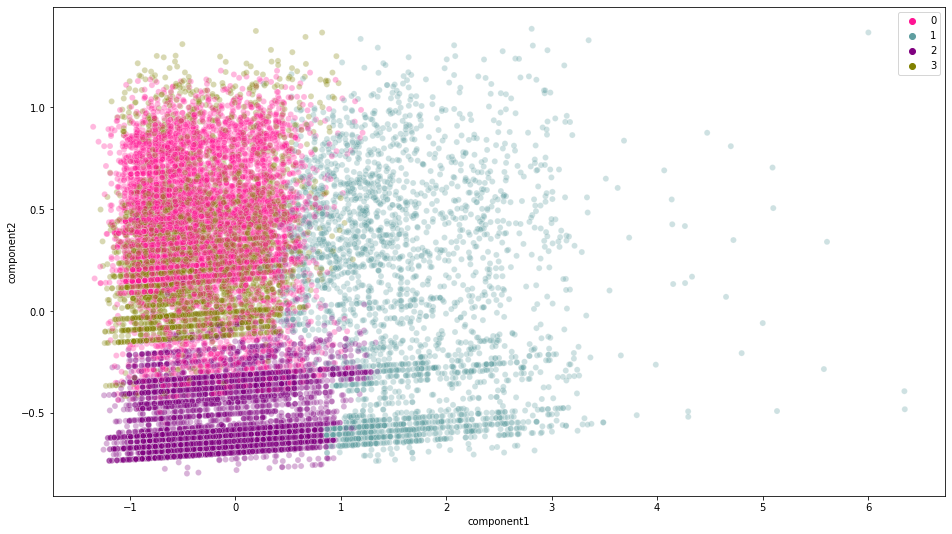

In [15]:
plt.rcParams['figure.figsize'] = (16, 9)


colores=['deeppink','cadetblue','purple','olive']
#,'deeppink','sienna','tomato','darkcyan','cadetblue','purple','olive'
asignar=[]
for row in labels:
    asignar.append(colores[row])

sns.scatterplot(data=aggdf, x="component1", y="component2", hue= labels, palette = colores, alpha = 0.3)


In [16]:
sil=metrics.silhouette_score(df, labels, metric = 'euclidean')
if sil < 0:
    print('silhouette:',round(sil,4),'-- samplea have been assigned to the wrong cluster')
elif sil < 0.5:
    print('silhouette:',round(sil,4),'-- overlaping samples')
else:
    print('silhouette:',round(sil,4),'-- good clustering')

silhouette: 0.2895 -- overlaping samples
